# COGS 108 - Final Project 

# Overview

The project seeks to use the text from Yelp reviews on parks to predict what the corresponding Yelp rating would be on a scale of 1-5. It utilized TF-IDF and an SVC linear model to run this prediction. Ultimately, it ended up being a servicable predictor, achieving an accuracy of 52%, but one that also had much room for improvement.

# Name & GitHub

- Name: Derek Shibata
- GitHub Username: dkshibat

# Research Question

Using text analysis from Yelp reviews, how accurately can we predict what rating a park will get on Yelp? Can we, using these metrics and word analysis, then construct a fictional park that would earn very high ratings?

## Background and Prior Work

There has been lots of research and work done on Yelp in general, with it being one of the most used websites for reviews and ratings. However, most of these reviews have been on restaurants as opposed to parks. This is a significant difference as the words used to review restaurants can be substantially different than those used to describe parks.

From these studies, they used a couple of different methods to do this prediction, including Neural networks and linear models. Overall, they were able to pretty accurately predict what rating a review would give, with it getting up to around 88% with the neural network. I don't expect to get this high of an accuracy, since the reviews on parks can range much more and I feel that the words used to describe a 3 star vs. a 5 star won't differ that much. In addition, I will stick with more simplistic models than using neural networks.

References (include links):
- 1) https://www.kaggle.com/athoul01/predicting-yelp-ratings-from-review-text
- 2) https://www.researchgate.net/publication/280102160_Prediction_of_Yelp_Rating_using_Yelp_Reviews

# Hypothesis


While I do think it is possible to predict Yelp ratings, I ultimately don't think it is feasible to construct a fictional park that would earn high ratings. I think that the text analysis will turn out to be just a sentiment analysis, with the key words it pulls from the reviews only conveying how the reviewer feels as opposed to them using words that will allow one to see what makes a good park.

# Dataset(s)

- Dataset Name: Yelp Park Reviews
- Link to the dataset: https://github.com/dkshibat/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 2333

This dataset contains reviews on Yelp for parks in San Diego. Each observation has an id, which is just the park name, a rating in a range of 1-5, and text, which is the review as a string.

# Setup

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.utils import shuffle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dkshi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


# Data Cleaning

Overall, there was very little data cleaning that needed to be done for the dataset. I renamed the 'id' column to be called 'park' and 'text' to 'review' so that it was more descriptive. There were no missing values from this dataset, so nothing needed to be done there. I made sure that the rating section of the data was read in as an integer so that I could use a linear model. I also shuffled the data to ensure that there was a random assortment of parks in the training and test data.


In [36]:
df = pd.read_csv('../data/yelp_SD_reviews.csv', dtype={'rating':int})
df = df.rename(columns = {'id' : 'park', 'text': 'review'})
df = shuffle(df)
df.head()

,park,rating,review
1311,Lora Haight,5,We were extremely satisfied with Lora as our r...
773,Ocean Beach Veteran's Memorial,4,The plaque at the Veteran's Memorial in Ocean ...
513,San Diego School of Survival,5,Working with this company was easy and afforda...
499,City of San Diego,5,So this was my first time hanging out in San D...
1341,Torrey Pines Gliderport,5,What an awesome spot this is! My wife and I wa...


# Data Analysis & Results

First, I wanted to see how many of each rating there were in the dataset. As I thought, there were the most 4 and 5 ratings. I expected there to be more 1s than there were, but these were still the third most common rating. 

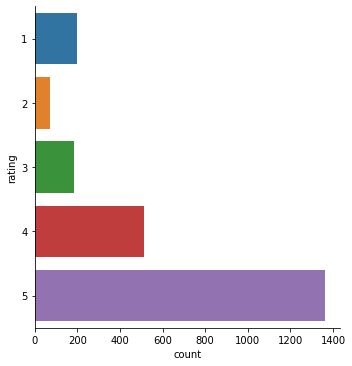

In [59]:
sns.catplot(y='rating', kind='count',data=df)

I used the Tfidf vectorizer as used in A6 to transform the reviews into an array. Then, I separated the data into a train and test set, which was on a 90/10 split.

In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True,analyzer='word',max_features=2000,tokenizer=word_tokenize)

In [29]:
df_X = tfidf.fit_transform(df['review']).toarray()
train_df_X = df_X[:int(len(df_X)*.9)]
test_df_X = df_X[int(len(df_X)*.9):]
df_Y = df['rating']
train_df_Y = df_Y[:int(len(df_Y)*.9)]
test_df_Y = df_Y[int(len(df_Y)*.9):]

I tried to train on a few different SVC kernels: linear, poly, and rbf.

In [30]:
trainer = SVC(kernel='linear')
trainer.fit(train_df_X,train_df_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

The linear model got the best results. As I expected, it was very hard for the predictor to predict ratings that would be in the range of 2-3. It got none of those correct on the test data. However, despite this, it still was able to achieve a weighted accuracy of .52, which is a solid improvement over the .2 accuracy you would get from random guesses.

In [31]:
pred_train_df_Y = trainer.predict(train_df_X)
pred_test_df_Y = trainer.predict(test_df_X)
print(classification_report(train_df_Y,pred_train_df_Y))
print(classification_report(test_df_Y, pred_test_df_Y))

              precision    recall  f1-score   support

           1       0.94      0.58      0.72       178
           2       1.00      0.03      0.06        63
           3       1.00      0.25      0.40       166
           4       0.80      0.59      0.68       469
           5       0.75      0.98      0.85      1223

    accuracy                           0.77      2099
   macro avg       0.90      0.49      0.54      2099
weighted avg       0.81      0.77      0.74      2099

              precision    recall  f1-score   support

           1       0.83      0.22      0.34        23
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.30      0.19      0.23        42
           5       0.64      0.91      0.75       141

    accuracy                           0.61       234
   macro avg       0.35      0.26      0.27       234
weighted avg       0.52      0.61      0.53       234



C:\Users\dkshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
trainer = SVC(kernel='poly')
trainer.fit(train_df_X,train_df_Y)

C:\Users\dkshi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
pred_train_df_Y = trainer.predict(train_df_X)
pred_test_df_Y = trainer.predict(test_df_X)
print(classification_report(train_df_Y,pred_train_df_Y))
print(classification_report(test_df_Y, pred_test_df_Y))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       178
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       166
           4       0.00      0.00      0.00       469
           5       0.58      1.00      0.74      1223

    accuracy                           0.58      2099
   macro avg       0.12      0.20      0.15      2099
weighted avg       0.34      0.58      0.43      2099

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        42
           5       0.60      1.00      0.75       141

    accuracy                           0.60       234
   macro avg       0.12      0.20      0.15       234
weighted avg       0.36      0.60      0.45       234



C:\Users\dkshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
trainer = SVC(kernel='rbf')
trainer.fit(train_df_X,train_df_Y)

C:\Users\dkshi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
pred_train_df_Y = trainer.predict(train_df_X)
pred_test_df_Y = trainer.predict(test_df_X)
print(classification_report(train_df_Y,pred_train_df_Y))
print(classification_report(test_df_Y, pred_test_df_Y))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       178
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       166
           4       0.00      0.00      0.00       469
           5       0.58      1.00      0.74      1223

    accuracy                           0.58      2099
   macro avg       0.12      0.20      0.15      2099
weighted avg       0.34      0.58      0.43      2099

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        42
           5       0.60      1.00      0.75       141

    accuracy                           0.60       234
   macro avg       0.12      0.20      0.15       234
weighted avg       0.36      0.60      0.45       234



C:\Users\dkshi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Ethics & Privacy

The main concern regarding privacy is that no personal information was revealed in the reviews themself. For instance, someone could have possibly mentioned the names of relatives or friends, or stated that the park is next to their house. If the authors of the reviews are public, then this will definitely need to be removed from the data as part of data cleaning, as this is in direct violation of privacy. After reading the Yelp Dataset Terms of Use, I am allowed to use the data provided by Yelp for academic studies.

The main bias I can think of is the fact that most reviewers come from people who think very highly of a park or had a horrible experience with it, with a significant lack of reviews from people who found it to be just mediocre or acceptable. Because of this, it may be hard to accurately predict park ratings on a scale of 1-5 when most are either 1 or 4/5.

# Conclusion & Discussion

This project was quite interesting to do and didn't prove to be too difficult. The amount of data given could have been greater, which would understandably have made the model more accurate. However, with the relatively small amount of available data, it was able to correctly predict the rating based on the review contents over half of the time. While this is not at the level of the 88% accuracy seen in the studies mentioned in the background, it is servicable for a simple linear model.

This study goes to show that the words used in reviews, even for parks, have a lot of similarities between each other to the point where linear models can make accurate predictions about how the reviewer would rate the said park. The English language can be used in a way where words alone are sufficient to make predictions that are in a way categorical. However, this still turned out to be more of a sentiment analysis, with the positives correlating to 4-5 star reviews while the negative would be 1 star. In the future, more complex models would have to be used to fit categorical data such as this.